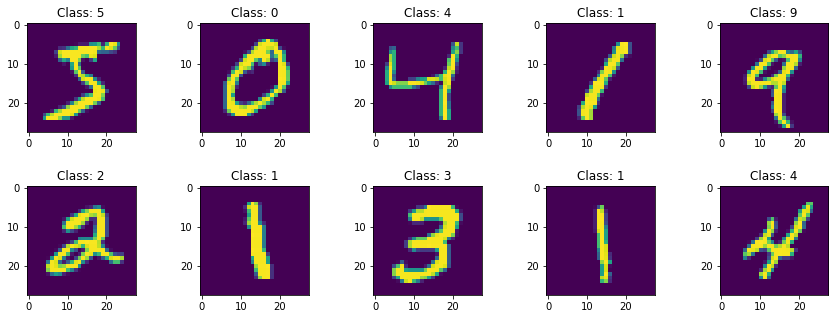

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 256)               200960    
                                                                 
 dense_47 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


,Test accuracy,Total Loss
0,97.91,0.083


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#reshape data from 3-D to 2-D array
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
x_train = minmax.fit_transform(x_train)
#transform testing dataset
x_test = minmax.transform(x_test)

fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(x_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(input_dim = x_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

#fit training dataset into the model
classifier_e25_fit = classifier_e25.fit(x_train, y_train, epochs=10, verbose=0)

from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate
#evaluate the model for testing dataset
test_loss_e25 = classifier_e25.evaluate(x_test, y_test, verbose=0)
#create evaluation dataframe
stats_e25 = pd.DataFrame({'Test accuracy' :  round(test_loss_e25[1]*100,3),
                          'Total Loss'    : round(test_loss_e25[0],3)}, index=[0])
#print evaluation dataframe
display(stats_e25)

11490434/11490434 [==============================] - 0s 0us/step


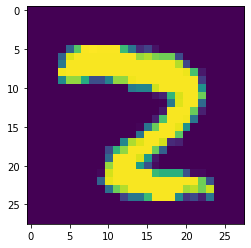

tensor(5, dtype=torch.uint8)
num_epochs :  5000


<ipython-input-1-f215099007b1>:62: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  trainset=np.array(list(zip(X_train,y_train)))
<ipython-input-1-f215099007b1>:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trainset=np.array(list(zip(X_train,y_train)))


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from random import random

def flatten(X_data):
  flatten_data=[]
  for i in range(len(X_data)):
    sample=X_data[i]
    flatten_row=[]
    for row in sample:
      flatten_row+=list(row)
      pass
    pass
    flatten_data.append(np.array(flatten_row,dtype='float32'))
    pass
  return np.array(flatten_data)
  pass


(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train=X_train[0:100]
y_train=y_train[0:100]

# visualize one of the images in data set
sample_image_mat=X_train[int(random()*len(X_train))]
plt.imshow(sample_image_mat)
plt.show()


X_train=flatten(X_train)
# X_test=flatten(X_test)

scaler = MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)

X_train=torch.tensor(X_train)
# X_test=torch.tensor(X_test)

y_train=torch.tensor(y_train)
# y_test=torch.tensor(y_test)

print(y_train[0])

batch_size = 100
n_iters = 5000

num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

print("num_epochs : ",num_epochs)
trainset=np.array(list(zip(X_train,y_train)))
trainloader = DataLoader(trainset, batch_size=batch_size,shuffle=True)


# dataiter = iter(trainloader)
# for _ in range(len(X_train)-1):
#   input,target=next(dataiter)
#   print(target,input)
#   pass
# print(trainloader)